In [49]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2
import skimage

Задание на практику.

1. Изучить блокнот.
1. Повторить на других изображениях.
1. Найти еще не менее 3х фильтров, которые применяются для работы с изображениями.
1. Применить найденные фильтры.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!pip install scipy
!pip install  matplotlib
!pip install  imageio
!pip install  pillow
!pip install  numpy
!pip install  scikit-image
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install torchvision


# Библиотека OpenCV и работа с изображениями

Ссылка на документацию:
https://docs.opencv.org/4.10.0/d9/df8/tutorial_root.html

## Инициализация

Сегодня мы работаем с изображениями. Давайте загрузим несколько. Вы можете загрузить изображения с помощью команды Unix/Windows curl. После загрузки изображения находятся в локальной файловой системе.

Источники изображений:

Place Kitten — Конечно, мы будем использовать изображения кошек! Мы используем базовый URL Place Kitten, за которым следуют ширина и высота, разделенные обратными косыми чертами ''/''. Например, используйте URL https://placekitten.com/500/300, чтобы получить изображение кошки шириной 500 пикселей и высотой 300 пикселей.

Ну и еще изображение Ван Гога из wikimedia в приличном разрешении.


Вы можете использовать любое другое изображение, если хотите.




In [52]:
!curl -o "cat.jpg" "https://placekitten.com/500/300"

!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0     49      0 --:--:-- --:--:-- --:--:--    49
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2143  100  2143    0     0  11163      0 --:--:-- --:--:-- --:--:-- 11219


## OpenCV

OpenCV — чрезвычайно популярная библиотека компьютерного зрения, написанная на C++, с множеством мощных инструментов для CV. Она позволяет читать, записывать и показывать изображения и видео, читать потоки веб-камеры, находить совпадающие ключевые точки между двумя изображениями и многое другое.

OpenCV написана на C++, однако есть библиотека Python, которая использует эти оптимизированные библиотеки C++ и предоставляет API с использованием массивов numpy!

Давайте импортируем OpenCV

In [53]:
import cv2

Чтение файла:

In [82]:
image = cv2.imread("фото.jpg")

Изображения - это тензор!
PS все, вообще все - или тензор или вектор.

In [83]:
type(image), image.shape, image.dtype

(numpy.ndarray, (259, 194, 3), dtype('uint8'))

## Каналы и форматы изображений
Форма цветного изображения — это (высота, ширина, цвета BGR)
Хотя может показаться странным, что высота идет первой, это потому, что OpenCV обрабатывает изображения как «строки» и «столбцы» изображения. «Высота» изображения — это количество строк!

Цветные изображения состоят из «каналов» — каждый цвет, который мы можем отобразить, представляет собой некоторую комбинацию красного, зеленого и синего (ИЛИ, в случае изображения в оттенках серого, серого).

In [84]:
image.shape

(259, 194, 3)

In [85]:
image[0,0] # Получить значение пикселя, размещенного в точке (0,0) от верхнего левого угла

array([230, 207, 181], dtype=uint8)

## Отображение изображения

Если вы используете скриптовый Python (не Jupyter notebook), команда imshow отобразит изображение. Однако это может вызвать проблемы в Jupyter notebooks.

В Colab вы можете использовать следующую функцию в качестве замены:
from google.colab.patches import cv2_imshow

На моей машине, однако, я также могу отображать изображения с помощью imshow (код ниже). Это остановит выполнение блокнота, пока вы не закроете окно с изображением.

Running on CoLab


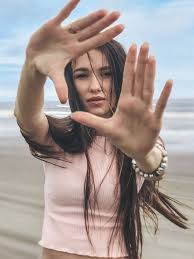

In [86]:
# cv2.imshow('test', image)  #это работает на локальной машине

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


cv2_imshow(image)

## Каналы изображений



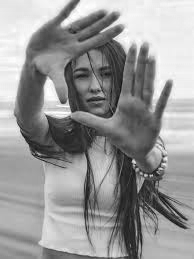

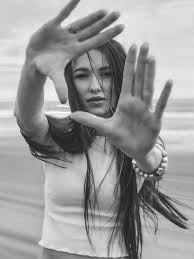

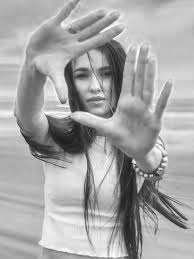

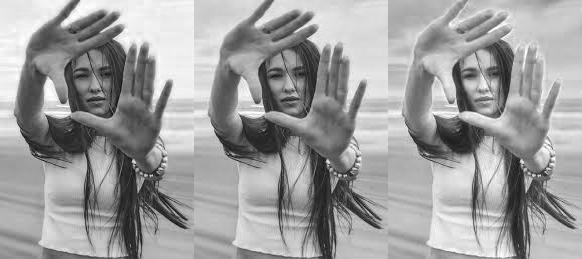

In [87]:
c1, c2, c3 = image[:,:,0], image[:,:,1], image[:,:,2]

# отображаем
cv2_imshow(c1)
cv2_imshow(c2)
cv2_imshow(c3)

# или все в одну строку
cv2_imshow( np.concatenate((c1,c2,c3), axis=1) )

Created image of shape (259, 194, 3)


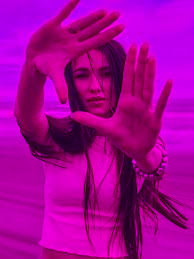

In [88]:
empty_arr = np.zeros(c2.shape, dtype=np.uint8)

# Складываем каналы, получаем новый 3 канал
manipulated_image = np.stack([ c1, empty_arr, c3, ], axis=2)
print("Created image of shape",manipulated_image.shape)
cv2_imshow(manipulated_image)

In [89]:
import os
# сохраняем изображение

output_path = os.path.join("output.png")
cv2.imwrite(output_path, manipulated_image)

True

Read file of shape: (259, 194, 3) type uint8


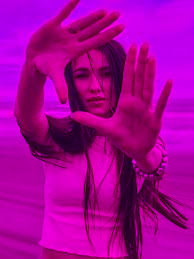

In [90]:
# читаем напрямую из файла

test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
cv2_imshow(test_read_output)

##Отображение с Matplotlib

Кроме того, мы можем построить изображение с помощью matplotlib. Это очень полезно, если вы хотите рисовать поверх изображений. OpenCV предоставляет базовые функции, но Matplotlib намного лучше (например, пунктирные линии невозможны с OpenCV).

Поскольку изображения представляют собой массив numpy, это должно быть просто, не так ли?

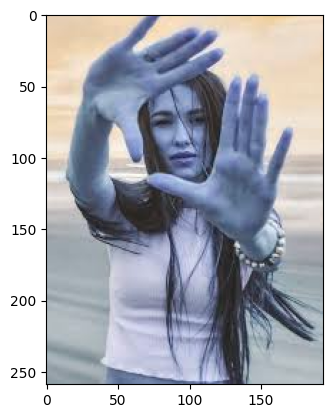

In [91]:
plt.imshow(image)
plt.show()

Цвета не те! Что происходит?

По умолчанию цветные изображения открываются OpenCV как BGR, то есть значения для данного пикселя упорядочены «синий, зеленый, красный».

Мы можем использовать функцию cv2.cvtColor, чтобы изменить цветовую систему нашего изображения.

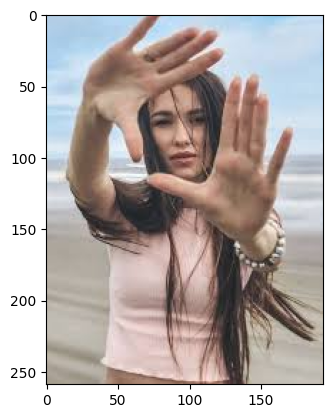

In [92]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Matplotlib предполагает, что изображения находятся в формате RGB. OpenCV предполагает, что изображения находятся в формате BGR. Поэтому мы преобразуем цвета перед показом изображения. Вот функция для показа изображений OpenCV с помощью matplotlib.

In [93]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Отрисовываем
    plt.imshow(image, *args, **kwargs)
    # Мы также отключим отображение осей и делений на графике.
    plt.axis('off')
    # Смотрим, что получилось
    plt.show()

## Фильтр Байера

Датчики изображения имеют фильтр Байера на сенсорных элементах (пикселях). Таким образом, каждый второй пиксель в четных строках красный, каждый второй пиксель в нечетных строках синий, и каждый второй пиксель во всех строках содержит зеленый:

_ 0 1

0 R G

1 G B

Давайте создадим необработанное изображение с таким шаблоном Байера из наших загруженных изображений. Мы можем использовать маски и срезы.

(259, 194, 3)


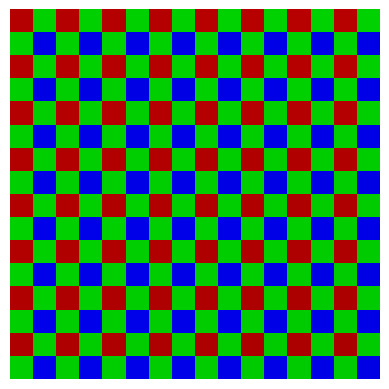

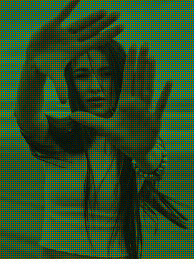

In [94]:
#
print(image.shape)
red_mask = np.zeros(shape=image.shape[0:2],dtype=bool)
green_mask, blue_mask = red_mask.copy(), red_mask.copy()
red_mask[0::2,0::2] = True
blue_mask[1::2,1::2] = True
green_mask[0::2,1::2] = True
green_mask[1::2,0::2] = True

# display red
rsize = np.ceil(np.asarray(red_mask.shape)/2.0).astype(int)
reds = image[:,:,2][red_mask].reshape(rsize)
#cv2_imshow(reds)

# display blue
bsize = np.floor(np.asarray(blue_mask.shape)/2.0).astype(int)
blues = image[:,:,0][blue_mask].reshape(bsize)
#cv2_imshow(blues)

# construct a Bayer image:
bayer = np.zeros(shape=(*image.shape[0:2],3),dtype=image.dtype)
# assing colors (BGR)
bayer[:,:,0][blue_mask]  = blues.flatten() # B
bayer[:,:,2][red_mask]   = reds.flatten() # R
bayer[:,:,1][green_mask] = image[:,:,1][green_mask] # Green
imshow(bayer[:16,:16]) # show zoomed in
cv2_imshow(bayer)

Первый рисунок  показывает, что регистрирует большинство цветных датчиков изображения. Процесс преобразования такого рисунка Байера в цветное изображение называется демозаикой (demosaicing).

## Наивное изменение размера изображения
… просто отбрасывая строки и столбцы. Для этого мы можем использовать нотацию срезов Python.

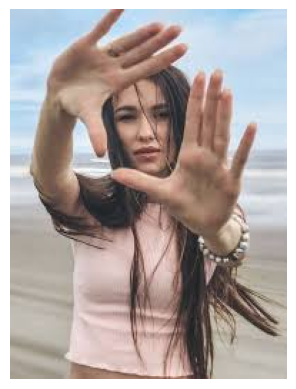

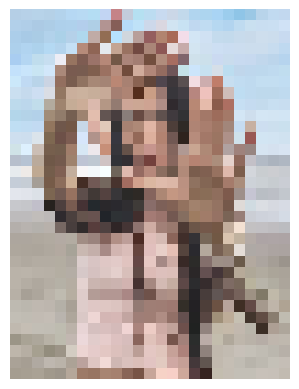

In [95]:
def downsample( img ):
    return img[0::2,0::2]

half = downsample(image)    # 1/2 resolution
quad = downsample(half)     # 1/4
eighth = downsample(quad)   # 1/8
imshow(image)
#imshow(half)
#imshow(quad)
imshow(eighth)

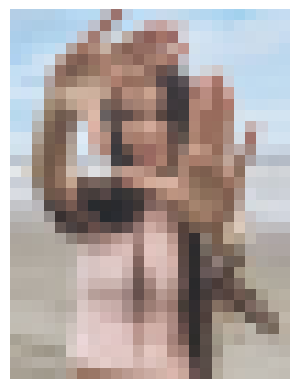

In [96]:
smooth = cv2.resize(image, eighth.shape[1::-1], interpolation=cv2.INTER_AREA)
imshow(smooth)

Отбрасывание пикселей — не лучший способ уменьшения масштаба изображений.

Давайте сравним с уменьшенным изображением с помощью встроенной функции изменения размера OpenCV.

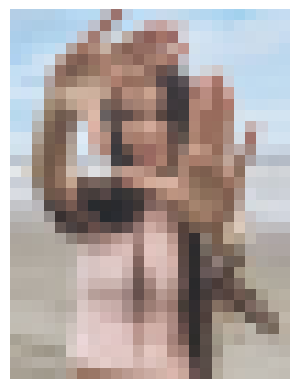

In [97]:
smooth = cv2.resize(image, eighth.shape[1::-1], interpolation=cv2.INTER_AREA)
imshow(smooth)

## Упражнения

***1 упражнение.***

Оттенки серого: Цвет хорош, но монохромные изображения также очень привлекательны. Отображение одного цветового канала выглядит не очень хорошо. Поэтому нам нужна взвешенная сумма всех каналов. Типичные веса для преобразования из RGB в оттенки серого:

0,2989∗R+0,5870∗G+0,1140∗B

(a) Загрузите изображение gogh.jpg. Преобразуйте его в оттенки серого и отобразите. Не забывайте, что каналы — это BGR.


***2 упражнение.***

Гамма-кривая: 8-битные изображения хранятся нелинейно (как наше восприятие).
Обычной функцией, используемой для этого нелинейного линейного отображения, является гамма-кривая: $y=x^\gamma$, где x — линейные значения в диапазоне [0,1]. Гамма равна $\gamma=2.2$ в большинстве систем.

(a) Линеаризуйте изображение и отобразите его. Обратите внимание, что отображение линейного изображения может выглядеть странно.

(b) Примените разные γ (например, 0,5, 1,0 и 1,5) и посмотрите, что происходит.

# Фильтры

Пространственная фильтрация изображения – это метод, при котором каждая точка изображения последовательно обрабатывается с помощью оператора, представленного в виде квадратной матрицы. Результатом работы этого метода является оценка значимости каждого пикселя изображения. Одним из признаков значимости пикселей являются резкие перепады яркости.

Большинство рассмотренных ниже методов основываются на одном из базовых свойств сигнала яркости – разрывности. Наиболее общим способом поиска разрывов является обработка изображения с помощью скользящей маски, называемой также фильтром, ядром, окном или шаблоном, которая представляет собой некую квадратную матрицу, соответствующую указанной группе пикселей исходного изображения. Элементы матрицы принято называть коэффициентами. Оперирование такой матрицей в каких-либо локальных преобразованиях называется фильтрацией или пространственной фильтрацией.

Процесс основан на простом перемещении маски фильтра от точки к точке изображения; в каждой точке $(x,y)$ отклик фильтра вычисляется с использованием предварительно заданных связей. В случае линейной пространственной фильтрации отклик задается суммой произведения коэффициентов фильтра на соответствующие значения пикселей в области, покрытой маской фильтра.

При обнаружении перепадов яркости используются дискретные аналоги производных первого и второго порядка.

### Фильтр Гаусса

Фильтр размытия по гауссу (широко известный ''gaussian blur'' в фотошопе)
достаточно часто применяется сам по себе или как часть других алгоритмов
обработки изображений.

Применение размытия по Гауссу к изображению математически аналогично свёртке
изображения с помощью функции Гаусса. Оно также известно как двумерное
преобразование Вейерштрасса. Поскольку преобразование Фурье функции Гаусса само
является функцией Гаусса, применение размытия по Гауссу приводит к уменьшению
высокочастотных компонентов изображения. Таким образом, размытие по Гауссу
является фильтром нижних частот.


В этом способе размытия функция Гаусса (которая также используется для описания нормального распределения в теории вероятностей) используется для вычисления преобразования, применяемого к каждому пикселю изображения. Формула функции Гаусса в одном измерении:

$${\displaystyle G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}}$$

В двух измерениях это произведение двух функций Гаусса, по одной для каждого измерения:

$${\displaystyle G(x,y)={\frac {1}{2\pi \sigma ^{2}}}e^{-{\frac
{x^{2}+y^{2}}{2\sigma ^{2}}}}}$$

где $x$, $y$ — координаты точки, а $\sigma$ — среднеквадратическое отклонение нормального распределения. При применении в двух измерениях эта формула даёт поверхность, контуры которой представляют собой концентрические окружности с нормальным распределением относительно центральной точки.

In [104]:
filename = "камень.jpg"

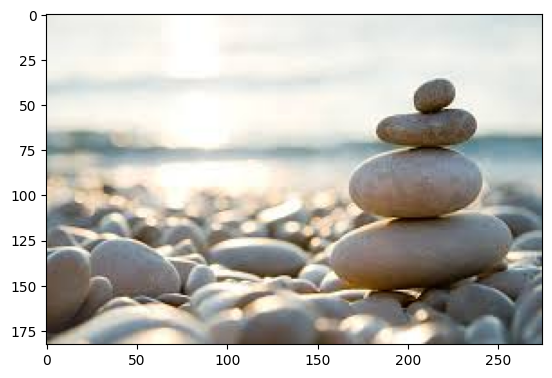

In [105]:
pic = PIL.Image.open(filename)
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
PIL_image.save("мэн.jpg")
plt.imshow(pic)


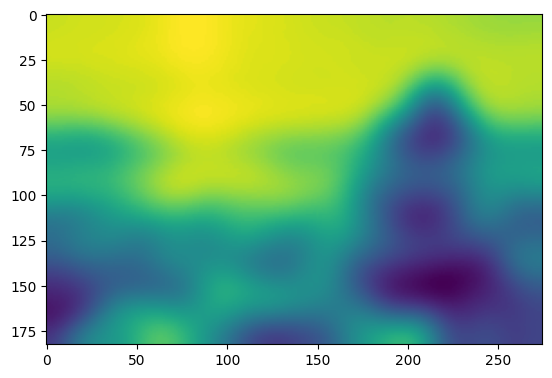

In [106]:
plt.imshow(PIL_image)

### Фильтр Прюитт

Оператор Прюитт используется при обработке изображений, в частности в алгоритмах обнаружения границ. Технически это оператор дискретного дифференцирования, вычисляющий аппроксимацию градиента функции интенсивности изображения. В каждой точке изображения результатом оператора Превитта является либо соответствующий вектор градиента, либо норма этого вектора.

Оператор использует два ядра 3×3, свёртывая исходное изображение для вычисления приближённых значений производных: одно по горизонтали и одно по вертикали. Положим $\mathbf {A}$ исходным изображением, и ${\displaystyle \mathbf {G_{x}} }, {\mathbf  {G_{y}}}$ — двумя изображениями, в которых каждая точка содержит горизонтальное и вертикальное приближение производной, которая рассчитывается как

$$\mathbf {G_{x}} = {\begin{bmatrix}-1&0&+1\\-1&0&+1\\-1&0&+1\end{bmatrix}} * A$$

$$\mathbf {G_{y}} ={\begin{bmatrix}-1&-1&-1\\0&0&0\\+1&+1&+1\end{bmatrix}}*A$$

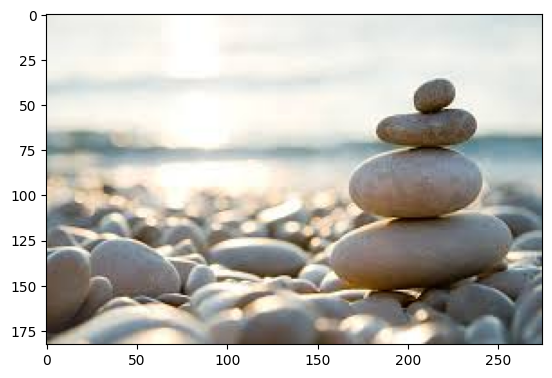

In [107]:
pic = PIL.Image.open(filename)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')

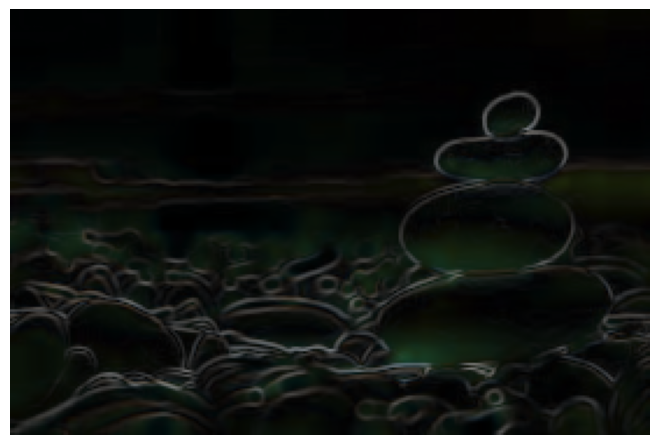

In [108]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

#измененное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')


plt.savefig("мэн.jpg", dpi=300)

 Задание 3 собственных фильтра:

Фильтр 1. Выделение краёв Кэнни - используется для определения границ объектов на изображении.

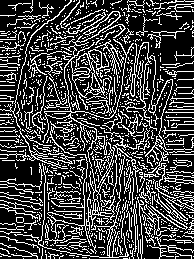

In [101]:
image_boy = cv2.imread("фото.jpg")
image_boy_1 = cv2.Canny(image, 10, 20)
cv2_imshow(image_boy_1)

Фильтр 2. Аффинное преобразование — это преобразование изображения, сохраняющее прямые линии и параллельность (но не углы и длины). Фактически, это любые комбинации базовых операций: Поворот (rotation),Масштабирование (scaling),Сдвиг (translation) + Наклон (shear)

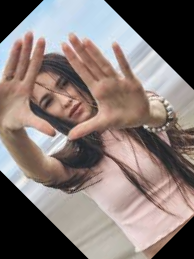

In [102]:
rows, cols = image_boy.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Поворот на 45°
rotated = cv2.warpAffine(image_boy, M, (cols, rows))
cv2_imshow(rotated)

Фильтр 3. Мультяшный эффект - Превращает фото в изображение, похожее на мультфильм или комикс: гладкие цветовые области + чёткие контуры.

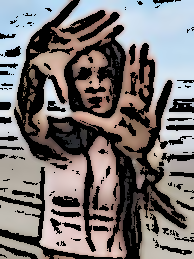

In [103]:
def cartoon_effect(image_boy):
    # 1. Уменьшаем шум
    img_color = cv2.bilateralFilter(image_boy, 9, 300, 300)

    # 2. Создаём контуры
    gray = cv2.cvtColor(image_boy, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, 7)
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 9, 2)

    # 3. Накладываем
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    cartoon = cv2.bitwise_and(img_color, edges_colored)
    return cartoon
a = image_boy
cv2_imshow(cartoon_effect(a))